
# Parent of Origin Effect Detection

This notebook demonstrates how to use the `parent_of_origin` module from bystro to detect parent of origin effects in genetic studies. The parent of origin effect refers to the differences in phenotypes depending on whether the allele is inherited paternally or maternally.

We will cover:
1. **POESingleSNP**: A class for analysis of the POE of a single SNP.
2. **POEMultipleSNP2**: A class for analysis of the POE of multiple SNPs at once.


## Link to paper
The paper is still WIP, the link will be added when done.

## How to load in data
1. **Import Numpy**: Import the Numpy library, a powerful library for numerical computing in Python.
2. **Load Data**: Use `np.loadtxt` to load the CSV data into a Numpy array (replace data.csv with the correct filepath)

Uncomment the following cell to load in data:

In [1]:
#import numpy as np 
#data_path = 'data.csv' # Change to path of file
#data = np.loadtxt(data_path, delimiter=',', skiprows=1) 
## delimiter=',' specifies that the data is comma-separated
## skiprows=1 skips the first row (header)

## Quick design philosophy in python

For those familiar with Python, objects work similarly to those in scikit-learn. For those new to Python: An object is a data structure that includes both data (attributes) and functions (methods) to manipulate that data. To create an object, instantiate a class with your desired parameters, and then call the fit method to train it, storing the results in the object's attributes, which you can access later.


## POESingleSNP Demonstration

The `POESingleSNP` class is used to detect the parent of origin effect for a single SNP. This class does not implement any sparsity assumptions.



### 1. Imports
First, let's import the necessary libraries and classes.

In [1]:
import numpy as np
from bystro.parent_of_origin.parent_of_origin import POESingleSNP # This is our POE detection class
from bystro.parent_of_origin.tests.test_parent_of_origin import generate_data # For generating synthetic demo data, not needed in actual analyses

### 2. Generating synthetic data

If you have real data, there is no need for this step.

We will use synthetic data to demonstrate how to get the p-value and POE using `POESingleSNP`.

In [3]:
# Parameters for data generation
beta_m = np.zeros(10)  # Coefficients for the mother's genotype
val = 0.5
beta_p = np.array([val, val, val, 0, 0, 0, 0, 0, 0, 0])  # Coefficients for the father's genotype
rng = np.random.default_rng(seed=2021) # Random number generation seed for reproducibility
n_individuals = 100000 # Number of individuals generated

# Generate data
data = generate_data(beta_m, beta_p, rng, n_individuals=n_individuals)
genotypes = data['genotype'] # n_individuals x 1 array of genotypes
phenotypes = data['phenotypes'] # n_individuals x 3 array of phenotypes

### 3. Fitting `POESingleSNP`

We will now initialize and fit the object:

In [4]:
# Initialize POESingleSNP class
poe_single_snp = POESingleSNP(
    compute_pvalue=True,                # Whether to compute p-values for the test
    compute_ci=True,                    # Whether to compute confidence intervals
    store_samples=False,                # Whether to store bootstrap samples
    pval_method="permutation",          # The method for p-value computation
    n_permutations_pval=1000,           # The number of permutations for p-value calculation (if pval_method is permutation)
    n_permutations_bootstrap=1000,      # The number of permutations for bootstrap confidence intervals
    cov_regularization="QuadraticInverse", # The method of covariance regularization to use
    svd_loss=None                       # The type of singular value shrinkage function to use (None is faster and doesn't shrink values)
)

# Fit model
poe_single_snp.fit(phenotypes, # Phenotype data, should be matrix of shape (n_indiviuals x n_phenotypes)
                   genotypes,  # Genotype data, should be array of shape (n_individuals, )
                   seed=2021   # Random number generation seed for reproducibility
                  )  

100%|█████████████████████████████████████| 1000/1000 [00:03<00:00, 315.94it/s]


### 4. Accessing attributes
After the model is fit, you can access the attributes such as the p value and confidence interval.

If compute_pvalue is set to True in the initialization of the POESingleSNP object, the p value can be extracted with the following code:

In [5]:
p_value = poe_single_snp.p_val
print(f"P-value: {p_value}")

P-value: 0.0


If compute_ci is set to True in the initialization of the POESingleSNP object, the confidence interval can be extracted with the following code:

In [6]:
conf_interval = poe_single_snp.confidence_interval_
print(f"Confidence Interval: {conf_interval}")

Confidence Interval: [[-0.57683728 -0.47020433]
 [-0.50295067 -0.40581274]
 [-0.50472039 -0.42447386]
 [-0.04220812  0.06497525]
 [ 0.01615975  0.12009063]
 [-0.06935688  0.04321829]
 [-0.0153729   0.08796174]
 [-0.05314328  0.04885311]
 [-0.0610899   0.04755684]
 [-0.04093844  0.06584926]]


In [7]:
poe_single_snp.parent_effect_

array([-0.53589667, -0.47519836, -0.48443204,  0.01960228,  0.079594  ,
       -0.01222375,  0.03398356, -0.00129935,  0.00120586,  0.02451667])

This class automatically calculates the POE effect size (estimated difference between mother and father coefficients) which can be extracted with the following code:

In [8]:
parent_effect = poe_single_snp.parent_effect_
print(f"Parent Effect: {parent_effect}")

Parent Effect: [-0.53589667 -0.47519836 -0.48443204  0.01960228  0.079594   -0.01222375
  0.03398356 -0.00129935  0.00120586  0.02451667]


In [9]:
conf_interval

array([[-0.57683728, -0.47020433],
       [-0.50295067, -0.40581274],
       [-0.50472039, -0.42447386],
       [-0.04220812,  0.06497525],
       [ 0.01615975,  0.12009063],
       [-0.06935688,  0.04321829],
       [-0.0153729 ,  0.08796174],
       [-0.05314328,  0.04885311],
       [-0.0610899 ,  0.04755684],
       [-0.04093844,  0.06584926]])


### 5. Plotting

In this section, we demonstrate how to plot the parent-of-origin effects with confidence intervals for the `POESingleSNP` model.

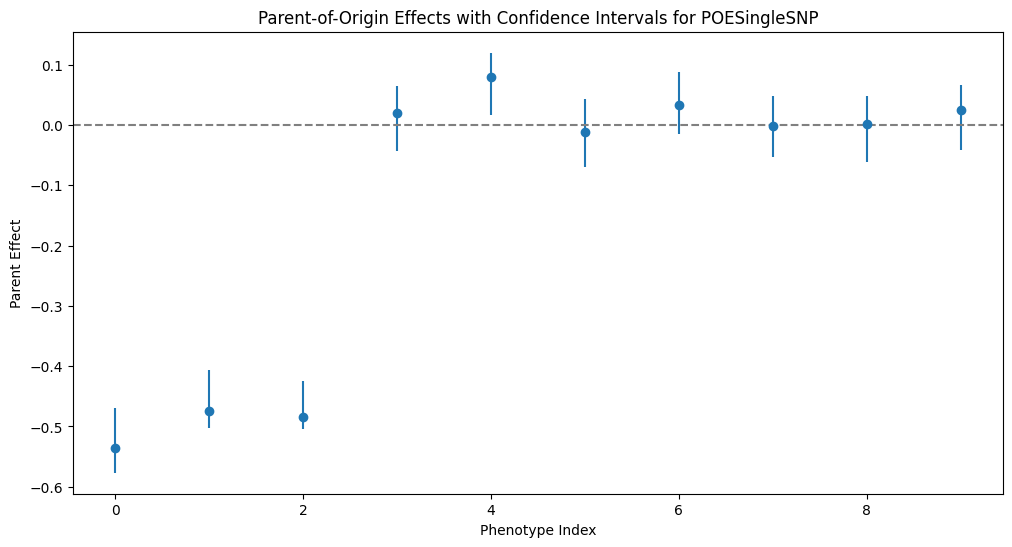

In [10]:
import matplotlib.pyplot as plt  # Import pyplot from matplotlib, a plotting library in Python

# Plotting the parent effect with confidence intervals
ci_lower = conf_interval[:,0]  # Extract the lower bounds of the confidence intervals
ci_upper = conf_interval[:,1]  # Extract the upper bounds of the confidence intervals

plt.figure(figsize=(12, 6))  # Create a new figure with a specific size (12 inches by 6 inches)
plt.errorbar(range(len(parent_effect)), parent_effect, yerr=[parent_effect - ci_lower, ci_upper - parent_effect], fmt='o')  
# Create an error bar plot:
# - x-axis: range(len(effect)) -> indices of the effects
# - y-axis: effect -> the parent effect values
# - yerr: [effect - ci_lower, ci_upper - effect] -> the error bars representing the confidence intervals
# - fmt='o': format of the data points as circles

plt.axhline(0, color='gray', linestyle='--')  # Draw a horizontal line at y=0 with a gray dashed line
plt.xlabel('Phenotype Index')  # Label the x-axis as 'Phenotype Index'
plt.ylabel('Parent Effect')  # Label the y-axis as 'Parent Effect'
plt.title('Parent-of-Origin Effects with Confidence Intervals for POESingleSNP')  # Add a title to the plot
plt.show()  # Display the plot


## POEMultipleSNP2 Demonstration

The `POEMultipleSNP2` class is used to detect the parent of origin effect for multiple SNPs at once. This class extends the capabilities of `POESingleSNP` to handle multiple SNPs.

### 1. Imports
First, let's import the necessary class and libraries.

In [11]:
from bystro.parent_of_origin.parent_of_origin import POEMultipleSNP2 # This is our multi SNP POE detection class
from bystro.parent_of_origin.tests.test_parent_of_origin import generate_multivariate_data # To generate synthetic data, not needed in real analyses

### 2. Generating synthetic data

If you have real data, there is no need for this step.

We will use synthetic data to demonstrate how to get the p-value using `POEMultipleSNP2`.

In [12]:
# Generate synthetic multivariate data
beta_m = np.zeros(40)  # Coefficients for the mother's genotype, initialized to zeros (40-dimensional)
beta_p = np.zeros(40)  # Coefficients for the father's genotype, initialized to zeros (40-dimensional)
beta_p[:3] = 0.75  # Set the first three coefficients of the father's genotype to 0.75

# Generate synthetic data using the specified parameters
data = generate_multivariate_data(
    beta_m,  # Mother's genotype coefficients
    beta_p,  # Father's genotype coefficients
    rng,  # Random number generator for reproducibility
    maf=0.03,  # Minor allele frequency for the genotypes
    n_individuals=100000,  # Number of individuals in the study
    n_genotypes=1000  # Number of genotypes generated
)

### 3. Fitting `POEMultipleSNP2`

We now fit the `POEMultipleSNP2` model to the generated synthetic data.

In [13]:
# Initialize POEMultipleSNP2 class
poe_multiple_snp = POEMultipleSNP2(
    pval_method="permutation",           # The method for p-value computation
    cov_regularization="QuadraticInverse",      # The method of covariance regularization to use
    svd_loss=None,                       # The type of SVD loss function to use
    n_repeats=2000                       # The number of permutations for null distribution of p-values
)
# Fit the POEMultipleSNP2 model
poe_multiple_snp.fit(
    data["phenotypes"],  # Phenotype data, should be matrix of shape (n_individuals x n_phenotypes)
    data["genotypes"],   # Genotype data, should be array of shape (n_individuals x n_genotypes)
    seed=2021            # Random number generation seed for reproducibility
)

100%|██████████████████████████████████████| 1000/1000 [00:39<00:00, 25.37it/s]


### 4. Plotting POEMultipleSNP2

We plot the distribution of p-values for the `POEMultipleSNP2` model.

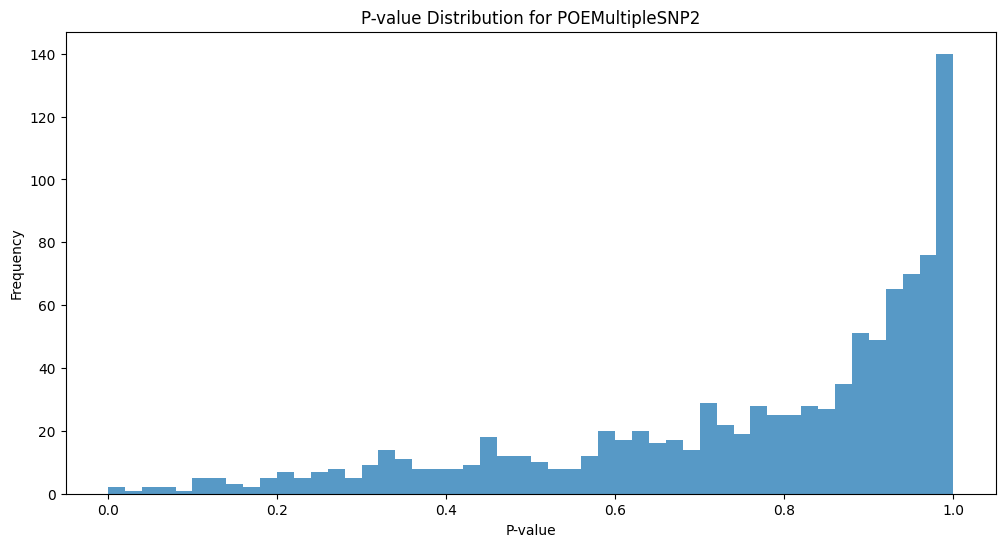

In [14]:
import matplotlib.pyplot as plt

# Plotting the p-values
plt.figure(figsize=(12, 6))  # Create a new figure with a specific size (10 inches by 5 inches)
plt.hist(poe_multiple_snp.p_vals, bins=50, alpha=0.75)  # Create a histogram of p-values with 50 bins and 75% opacity
plt.xlabel('P-value')  # Label the x-axis as 'P-value'
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'
plt.title('P-value Distribution for POEMultipleSNP2')  # Add a title to the plot
plt.show()  # Display the plot

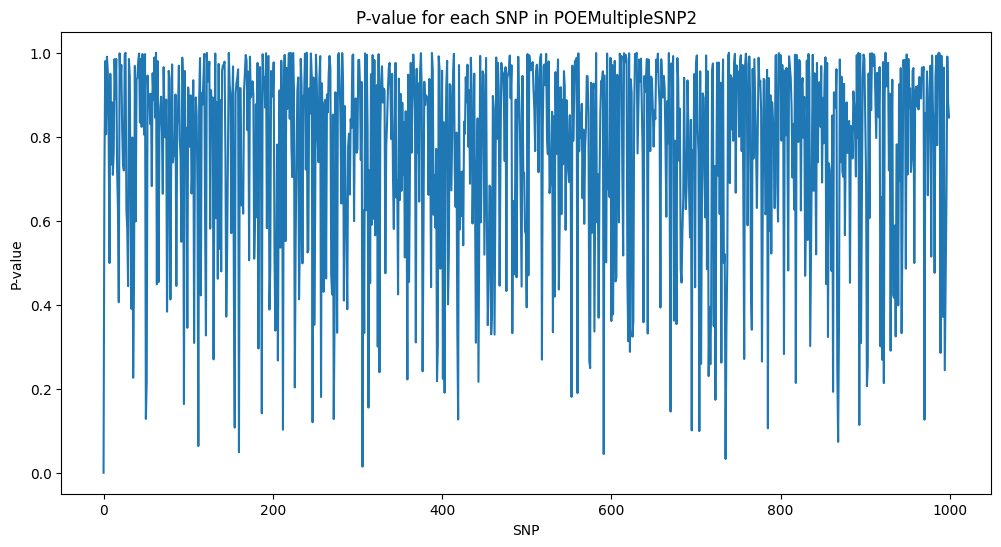

In [15]:
plt.figure(figsize=(12, 6))  # Create a new figure with a specific size (10 inches by 5 inches)
plt.plot(poe_multiple_snp.p_vals)  # Create a line plot
plt.xlabel('SNP')  # Label the x-axis
plt.ylabel('P-value')  # Label the y-axis
plt.title('P-value for each SNP in POEMultipleSNP2')  # Add a title to the plot
plt.show()  # Display the plot

Finally, we visualize the parent-of-origin effects from the `POEMultipleSNP2` model.

We first demonstrate how to get the indices of the significant and not significant SNPs, and get the corresponding effects:

In [16]:
# Get indices of significant (<0.05 p value) and not significant tests
significant_indices = np.where(poe_multiple_snp.p_vals < 0.05)[0]
nonsignificant_indices = np.where(poe_multiple_snp.p_vals >= 0.05)[0]

# Extract the corresponding effects
nonsignificant_effects = poe_multiple_snp.parent_effects_[nonsignificant_indices]
significant_effects = poe_multiple_snp.parent_effects_[significant_indices]

We plot the non significant (>0.05 p value) in blue and the first significant SNP in black.

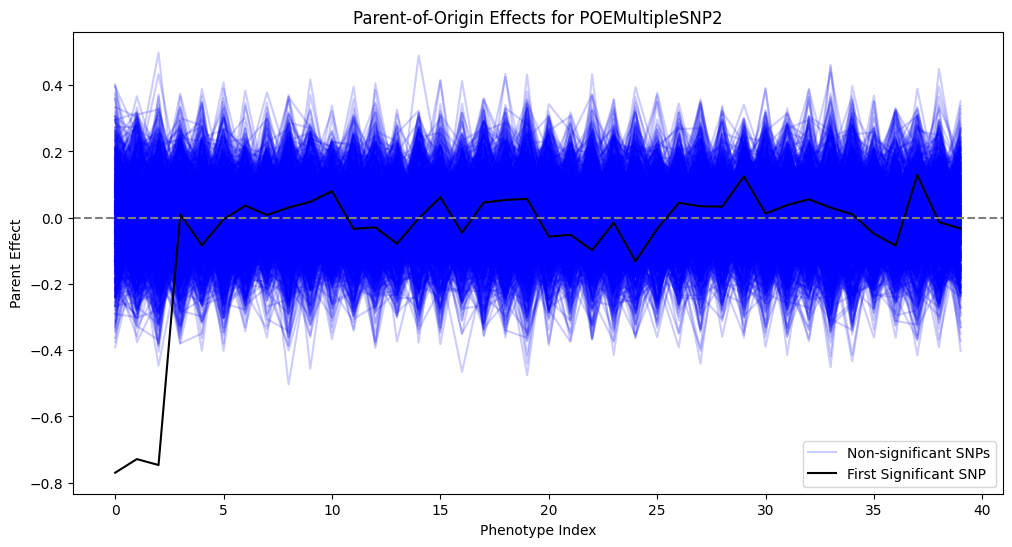

In [17]:
# Plotting the parent effects for significant and non-significant SNPs
x = np.arange(nonsignificant_effects.shape[1])  # Create an array of indices for the x-axis (phenotype indices)

plt.figure(figsize=(12, 6))  # Create a new figure with a specific size

# Plot non-significant effects
for i, effect in enumerate(nonsignificant_effects):
    if i == 0:
        plt.plot(x, effect, color='blue', alpha=0.2, label='Non-significant SNPs')  # Add label only for the first non-significant effect
    else:
        plt.plot(x, effect, color='blue', alpha=0.2)  # Plot non-significant effects in blue with 0.2 alpha

# Plot the first significant effect
if len(significant_effects) > 0:
    plt.plot(x, significant_effects[0], color='black', label='First Significant SNP')  # Plot the first significant effect in black

plt.axhline(0, color='gray', linestyle='--')  # Draw a horizontal line at y=0 with a gray dashed line
plt.xlabel('Phenotype Index')  # Label the x-axis
plt.ylabel('Parent Effect')  # Label the y-axis
plt.title('Parent-of-Origin Effects for POEMultipleSNP2')  # Add a title to the plot
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot
